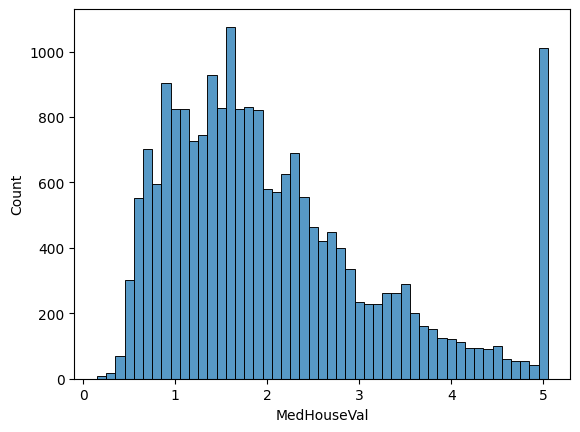

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     570.7
Date:                Tue, 05 Dec 2023   Prob (F-statistic):          5.15e-184
Time:                        02:23:59   Log-Likelihood:                -353.75
No. Observations:                 501   AIC:                             717.5
Df Residuals:                     496   BIC:                             738.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8084      0.567      1.425      0.1

In [1]:
# Load and Visualize the Data
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

sns.histplot(df['MedHouseVal'], binwidth=0.1)
plt.show()

# Train/Test Split
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=500/len(df), random_state=2023)

# Random Forest Model
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=2023)
rf_model.fit(train_df.drop('MedHouseVal', axis=1), train_df['MedHouseVal'])
rf_pred = rf_model.predict(test_df.drop('MedHouseVal', axis=1))

# Elastic Net Model
from sklearn.linear_model import ElasticNetCV

elastic_net_model = ElasticNetCV(cv=10, random_state=2023)
elastic_net_model.fit(train_df.drop('MedHouseVal', axis=1), train_df['MedHouseVal'])
en_pred = elastic_net_model.predict(test_df.drop('MedHouseVal', axis=1))

# SVM Model (SVR - Support Vector Regressor)
from sklearn.svm import SVR

svm_model = SVR()
svm_model.fit(train_df.drop('MedHouseVal', axis=1), train_df['MedHouseVal'])
svm_pred = svm_model.predict(test_df.drop('MedHouseVal', axis=1))

# Random Model
import numpy as np

def random_model(data_test):
    return np.random.uniform(0, 5, len(data_test))

rand_pred = random_model(test_df)

# Stacking Linear Regression Model
import statsmodels.api as sm

X_stacking = sm.add_constant(np.column_stack([rf_pred, en_pred, svm_pred, rand_pred]))
model_stacking = sm.OLS(test_df['MedHouseVal'], X_stacking)
results = model_stacking.fit()
stacking_pred = results.predict(X_stacking)

# Display the summary of the stacking model
print(results.summary())

# Calculate RMSE for Each Model
from sklearn.metrics import mean_squared_error

rf_rmse = mean_squared_error(test_df['MedHouseVal'], rf_pred, squared=False)
en_rmse = mean_squared_error(test_df['MedHouseVal'], en_pred, squared=False)
svm_rmse = mean_squared_error(test_df['MedHouseVal'], svm_pred, squared=False)
rand_rmse = mean_squared_error(test_df['MedHouseVal'], rand_pred, squared=False)
stacking_rmse = mean_squared_error(test_df['MedHouseVal'], stacking_pred, squared=False)

# Compare Model Performances
rmse_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Elastic Net', 'SVM', 'Random Model', 'Stacking Model'],
    'RMSE': [rf_rmse, en_rmse, svm_rmse, rand_rmse, stacking_rmse]
})

print(rmse_comparison)